<a name="top"></a>
<div style="width:1000 px">

<div style="float:right; width:98 px; height:98px;">
<img src="https://cdn.miami.edu/_assets-common/images/system/um-logo-gray-bg.png" alt="Miami Logo" style="height: 98px;">
</div>

<h1>Lunch Byte 11/15/2019</h1>
<h2>Basic Mapping in Python with Basemap and Cartopy</h2>
<h3>By Kayla Besong</h3>




<div style="clear:both"></div>
</div>

<hr style="height:2px;">

In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import netCDF4 as nc
from mpl_toolkits.basemap import Basemap
import cartopy.crs as ccrs


# Basemap 

### Back to basics

/Users/kaylabesong/anaconda2/envs/MPO624/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1708: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  limb = ax.axesPatch
/Users/kaylabesong/anaconda2/envs/MPO624/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1711: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  if limb is not ax.axesPatch:


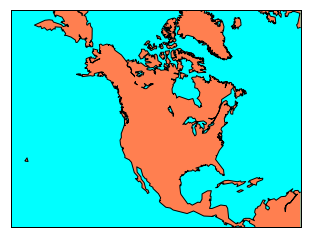

In [2]:
# create a basemap instance

m = Basemap(width=12000000,height=9000000,projection='lcc',
            resolution='c',lat_1=45.,lat_2=55,lat_0=50,lon_0=-107.)

m.drawcoastlines()                         # draw coastlines.

m.drawmapboundary(fill_color='aqua')       # draw a boundary around the map, fill the background.

m.fillcontinents(color='coral',lake_color='aqua')   # fill continents, set lake color same as ocean color.
plt.show()

In [3]:
def basemapping(subplot, i):
    
    m = Basemap(width=12000000,height=9000000,projection='lcc',
            resolution='c',lat_1=45.,lat_2=55,lat_0=50,lon_0=-107., ax = subplot)        
    
    if i == 0:
        
        m.drawlsmask(land_color='coral',ocean_color='aqua',lakes=True)
        
    if i == 1:
        
        m.bluemarble()
        
    if i == 2:
        
        m.shadedrelief()
        
    if i == 3:
        
        m.etopo()
    
    return m

/Users/kaylabesong/anaconda2/envs/MPO624/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:4995: MatplotlibDeprecationWarning: The is_scalar function was deprecated in version 2.1.
  elif masked and is_scalar(masked):
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


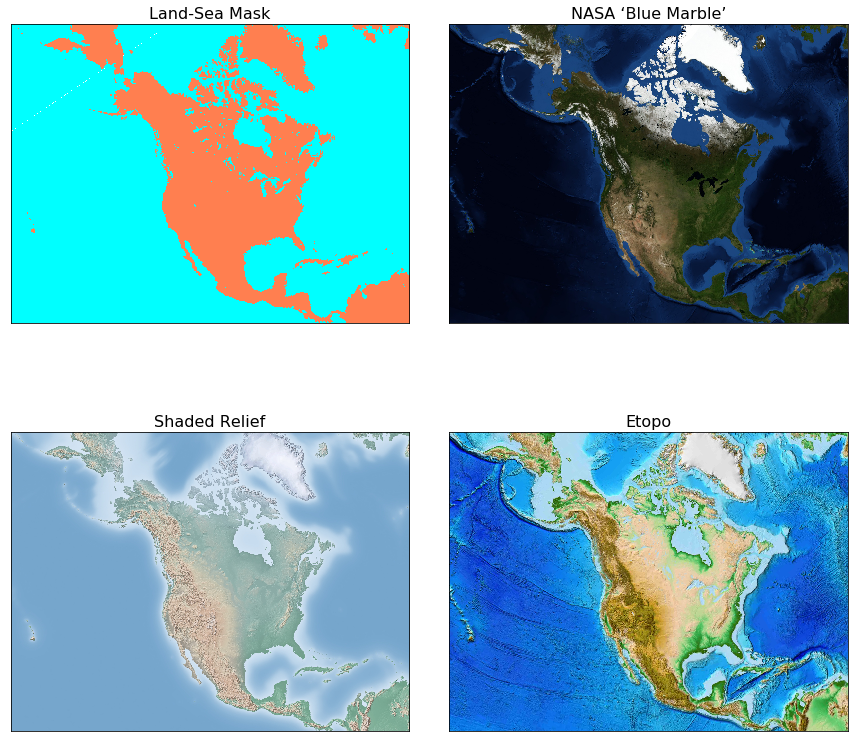

In [4]:
fig, axes = plt.subplots(2,2, figsize=(15, 15), facecolor='w', edgecolor='k')   # establish subplot figure 
fig.subplots_adjust(wspace = 0.1, hspace = 0.001)

axes[0,0].set_title('Land-Sea Mask', fontsize = 16) 
axes[0,1].set_title('NASA ‘Blue Marble’', fontsize = 16)
axes[1,0].set_title('Shaded Relief', fontsize = 16)
axes[1,1].set_title('Etopo', fontsize = 16)


for i, ax in enumerate(fig.axes):

    axes = basemapping(ax, i)



Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


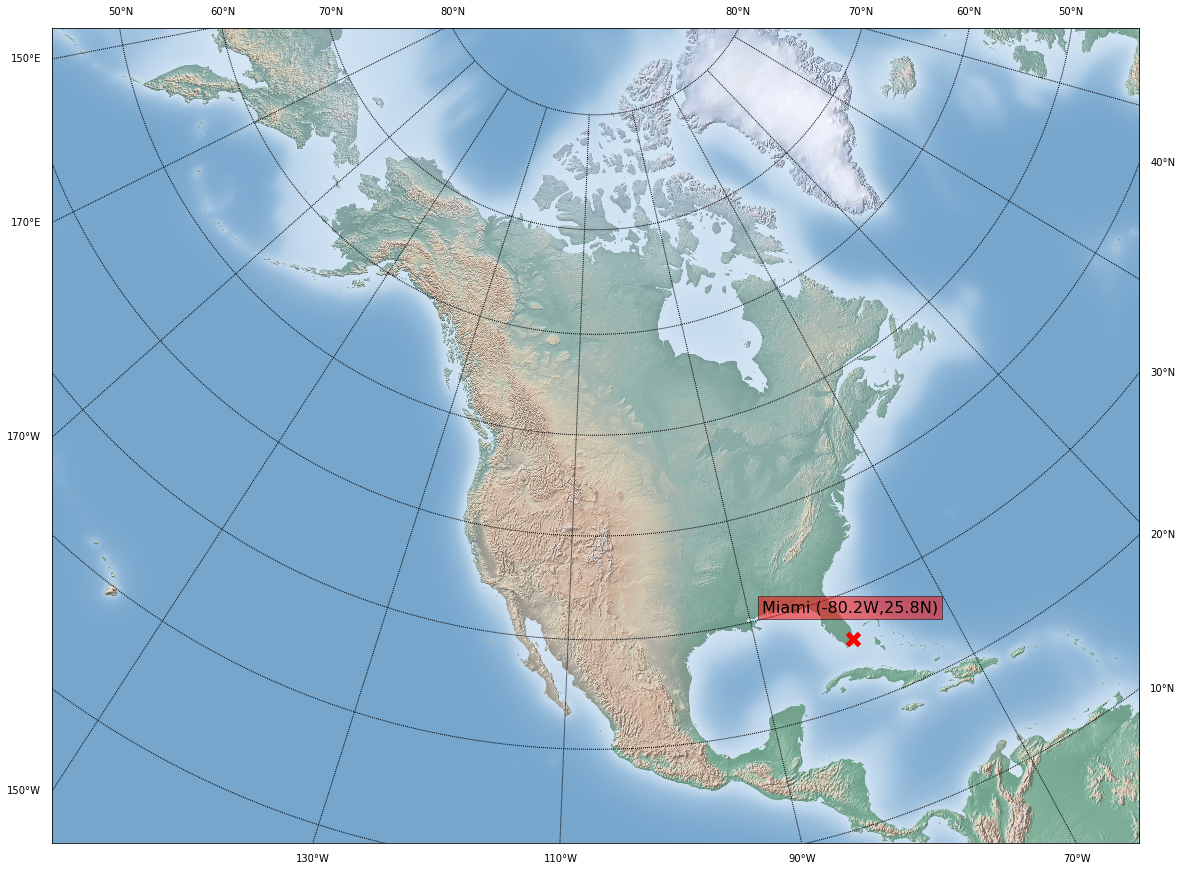

In [5]:
fig, axes = plt.subplots(1, figsize=(30, 15))

m = Basemap(width=12000000,height=9000000,projection='lcc',
            resolution='c',lat_1=45.,lat_2=55,lat_0=50,lon_0=-107.)

m.shadedrelief()


# draw parallels and meridians.
# label parallels on right and top
# meridians on bottom and left

parallels = np.arange(0.,81,10.)
meridians = np.arange(10.,351.,20.)

#labels = [left,right,top,bottom]

m.drawparallels(parallels,labels=[False,True,True,False])
m.drawmeridians(meridians,labels=[True,False,False,True])


# plot blue dot on Miami, FL and label it as such.

lon, lat = -80.19, 25.76 # Location of MIA

# convert to map projection coords.
# Note that lon,lat can be scalars, lists or numpy arrays.

xpt,ypt = m(lon,lat)

# convert back to lat/lon
lonpt, latpt = m(xpt,ypt,inverse=True)

m.plot(xpt,ypt,'rx', markersize = 12, markeredgewidth = 5)  # plot a red x there
# put some text next to the +, offset a little bit
# (the offset is in map projection coordinates)
plt.text(xpt-1000000,ypt+300000,'Miami (%5.1fW,%3.1fN)' % (lonpt,latpt), fontsize = 16, bbox=dict(facecolor='red', alpha=0.5))
plt.show()

# Import our previously downloaded data

In [6]:
concat_t = xr.open_dataset('temps_9520.nc')
concat_t

<xarray.Dataset>
Dimensions:  (lat: 37, lon: 144, time: 2192)
Coordinates:
  * time     (time) datetime64[ns] 1995-01-01 1995-01-02 1995-01-03 ...
    level    float32 ...
  * lat      (lat) float32 90.0 87.5 85.0 82.5 80.0 77.5 75.0 72.5 70.0 67.5 ...
  * lon      (lon) float32 0.0 2.5 5.0 7.5 10.0 12.5 15.0 17.5 20.0 22.5 ...
Data variables:
    air      (time, lat, lon) float32 ...

In [7]:
concat_h = xr.open_dataset('heights_9520.nc')
concat_h

<xarray.Dataset>
Dimensions:  (lat: 37, lon: 144, time: 2192)
Coordinates:
  * time     (time) datetime64[ns] 1995-01-01 1995-01-02 1995-01-03 ...
    level    float32 ...
  * lat      (lat) float32 90.0 87.5 85.0 82.5 80.0 77.5 75.0 72.5 70.0 67.5 ...
  * lon      (lon) float32 0.0 2.5 5.0 7.5 10.0 12.5 15.0 17.5 20.0 22.5 ...
Data variables:
    hgt      (time, lat, lon) float32 ...

### Merge into one dataset

In [8]:
%%time
data = concat_h.update(concat_t)
data

CPU times: user 1.27 ms, sys: 130 µs, total: 1.4 ms
Wall time: 1.3 ms


In [9]:
data['air'] = data['air'] - 273.15     #convert to Celsius 
data

<xarray.Dataset>
Dimensions:  (lat: 37, lon: 144, time: 2192)
Coordinates:
  * time     (time) datetime64[ns] 1995-01-01 1995-01-02 1995-01-03 ...
    level    float32 ...
  * lat      (lat) float32 90.0 87.5 85.0 82.5 80.0 77.5 75.0 72.5 70.0 67.5 ...
  * lon      (lon) float32 0.0 2.5 5.0 7.5 10.0 12.5 15.0 17.5 20.0 22.5 ...
Data variables:
    hgt      (time, lat, lon) float32 ...
    air      (time, lat, lon) float32 -32.45 -32.45 -32.45 -32.45 -32.45 ...

## Seasonal Averaging and Plotting

In [10]:
seasonal = data.groupby('time.season').mean(dim = 'time')              # use the 'powerful' groupby funtion to find seasonal averages 
seasonal

<xarray.Dataset>
Dimensions:  (lat: 37, lon: 144, season: 4)
Coordinates:
  * lat      (lat) float32 90.0 87.5 85.0 82.5 80.0 77.5 75.0 72.5 70.0 67.5 ...
  * lon      (lon) float32 0.0 2.5 5.0 7.5 10.0 12.5 15.0 17.5 20.0 22.5 ...
  * season   (season) object 'DJF' 'JJA' 'MAM' 'SON'
Data variables:
    hgt      (season, lat, lon) float32 5042.14 5042.14 5042.14 5042.14 ...
    air      (season, lat, lon) float32 -25.9305 -25.9305 -25.9305 -25.9305 ...

In [11]:
def mapping(subplot):
        
    ll = 180.        # lower lon bounds
    ul = 330.        # upper lon bounds
    lllat=20.        # lower lat bounds
    urlat=80.        # upper lat bounds

    m = Basemap(projection='cyl',llcrnrlat=lllat,urcrnrlat=urlat,\
            llcrnrlon=ll,urcrnrlon=ul,resolution='l' , ax = subplot, lon_0 = 0)         # establishing basemap, ax = subplot = key feature to make function/subplot loop work    
    

    m.drawcountries(linewidth=0.2)                                                      # map design specifications
    m.drawcoastlines(linewidth=0.2)
    m.drawmapboundary(fill_color='white')
    
    parallels = np.arange(25.,85.,20.)                                                  # setting range of where and how many lat/lon grid lines you want
    meridians = np.arange(-180.,181.,30.)

    m.drawparallels(parallels, labels=[1,0,0,0], fontsize = 20, dashes=[6,900])         # actually drawing them to map 
    m.drawmeridians(meridians, labels=[1,1,0,1], fontsize=20, dashes=[6,900])

    return m

In [12]:
def contours(subplot, temps, heights):
    
    lat_lon1 = False       # set to true if crossing meridian or your data might have gaps or not show up at all! 
                           # Criteria for lat_lon in contour or contourf 
        
    # extract raw numpy arrays from xarray 
    
    lons = temps.lon
    lats = temps.lat
    temps = temps.values   
    hgt = heights.values
    
    # call the mapping function to get your precalled mapping instance
    
    m = mapping(subplot)

    
    px,py = np.meshgrid(lons, lats)          # mesh lat/lon numpy arrays  
    
    # compute native map projection coordinates of lat/lon grid
    # does not actually know those are lat/lons!! 
    # this is a function of basemap and how it converts to given projection from your lat/lon array

    x,y = m(px, py)                          # apply meshed grid to map projection
            
    levels1 = np.arange(-40, 42, 2)          # set interval for temperature contours
    
    # contourf = contour fill for our temperatures
    # note still calling to mapping instance 

    tc = m.contourf(x, y, temps, 35, extend='both', cmap = 'seismic', latlon = lat_lon1, levels = levels1, vmin = -40, vmax = 40) 
    
    # contour = line contours 
    
    levels2 = np.arange(5000, 6050, 100)     # set interval for geopotential contours

    h_contour = m.contour(x, y, hgt, 15, extend = 'both', latlon = lat_lon1, colors = 'k', alpha = 0.75, levels = levels2)     # alpha sets transparency 
    h_contour.clabel(fontsize=15, colors='k', inline=1, inline_spacing=8, levels = levels2, fmt='%i', rightside_up=True, use_clabeltext=True);  
    
    return tc         # return contour plot for use in colorbar 

/Users/kaylabesong/anaconda2/envs/MPO624/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1708: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  limb = ax.axesPatch
/Users/kaylabesong/anaconda2/envs/MPO624/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1711: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  if limb is not ax.axesPatch:


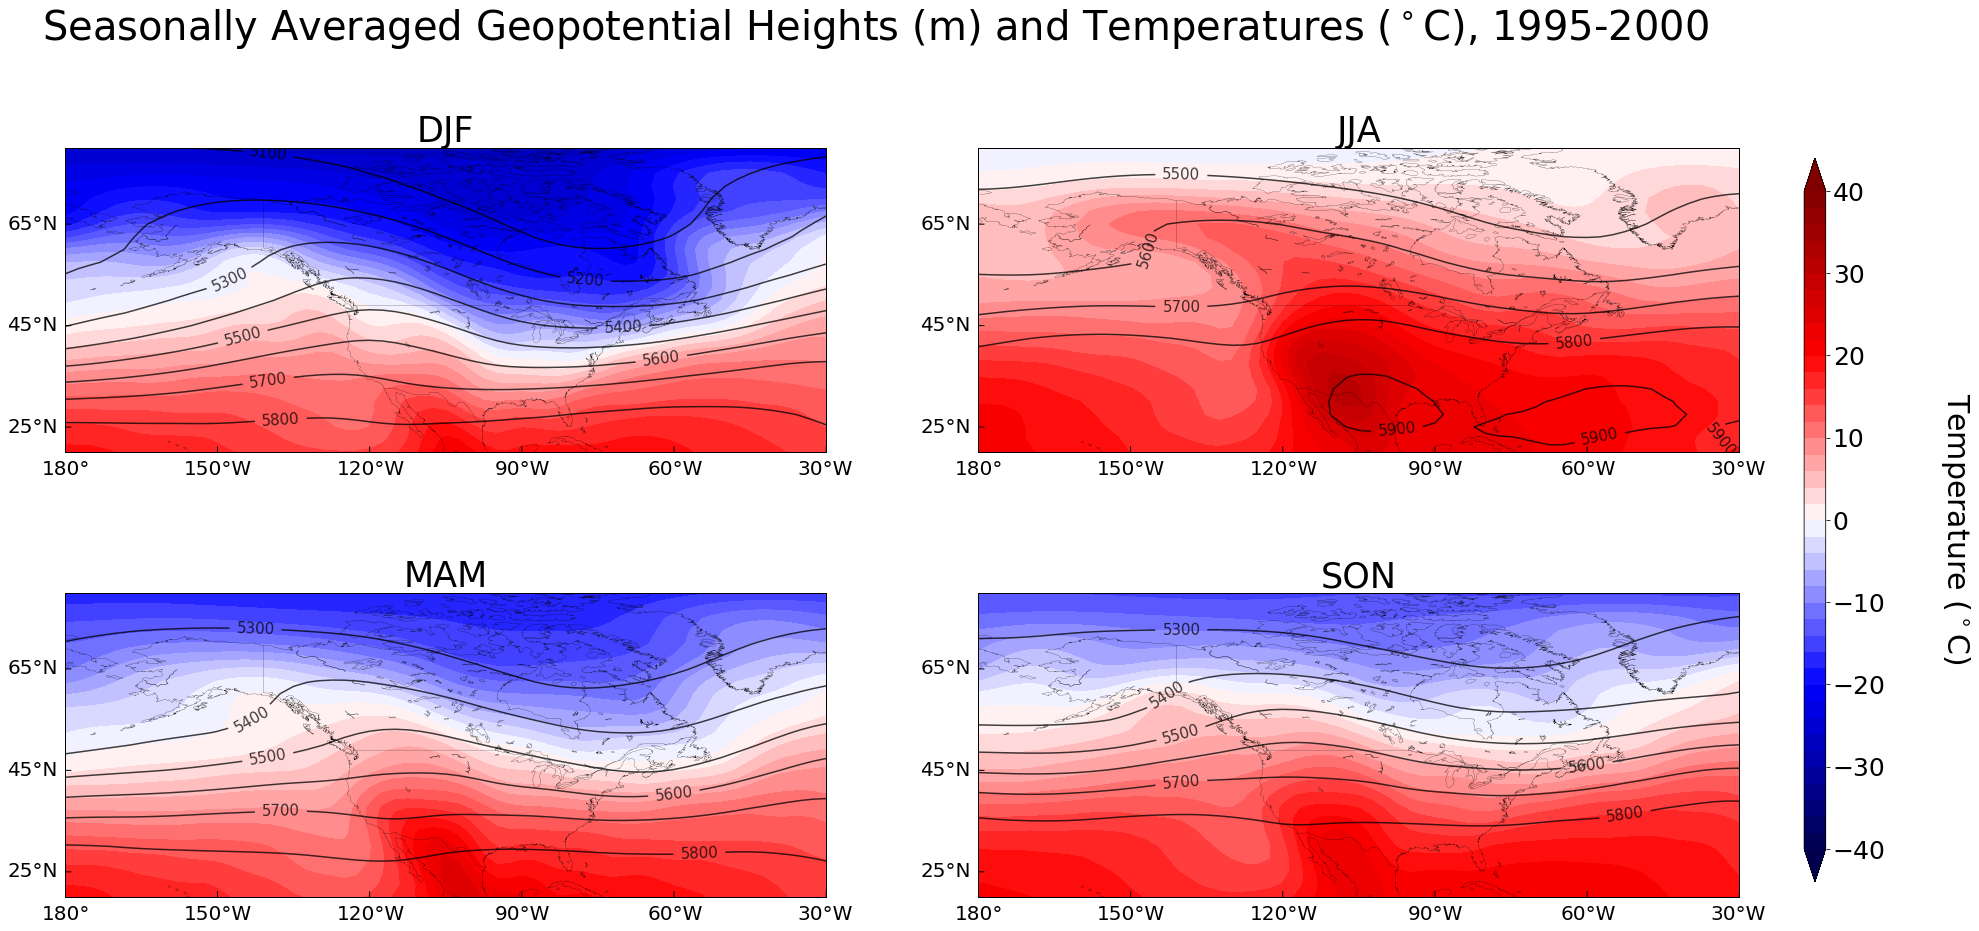

In [13]:
fig, axes = plt.subplots(2,2, figsize=(30, 15), facecolor='w', edgecolor='k', sharex =False, sharey = False)   # establish subplot figure 

labels = seasonal.season.values       # set array for plot labels 

for i, ax in enumerate(fig.axes):                                       # enumerate axes so that you dont have [0,1] etc., just 0,1,2,3

    ax.set_title(labels[i], fontsize = 35)
    ax1 = contours(ax, seasonal['air'][i], seasonal['hgt'][i])       # call created function and loop through and plot seasons based on data 
    
cax = fig.add_axes([0.93, 0.17, 0.01, 0.67])                            # customizing colorbar for one large one for plot by creating new axis
cb = plt.colorbar(ax1, cax=cax)
cb.ax.tick_params(labelsize=25)
    
fig.suptitle('Seasonally Averaged Geopotential Heights (m) and Temperatures ($^\circ$C), 1995-2000', fontsize=40, ha = 'center')     # don't forget to label :D 
fig.text(1, 0.6, "Temperature ($^\circ$C)", ha='center', fontsize=30, rotation = 270);


#plt.savefig('nameyourplothere.png', bbox_inches = "tight")     # bbox_inches limits the extra whitespcae once saved 

# Cartopy

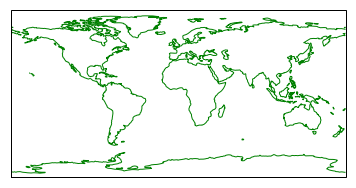

In [14]:
ax = plt.axes(projection=ccrs.PlateCarree(), )
ax.coastlines(resolution='110m', color = 'green')

# Save the plot by calling plt.savefig() BEFORE plt.show()
# plt.savefig('coastlines.pdf')
# plt.savefig('coastlines.png')

plt.show()

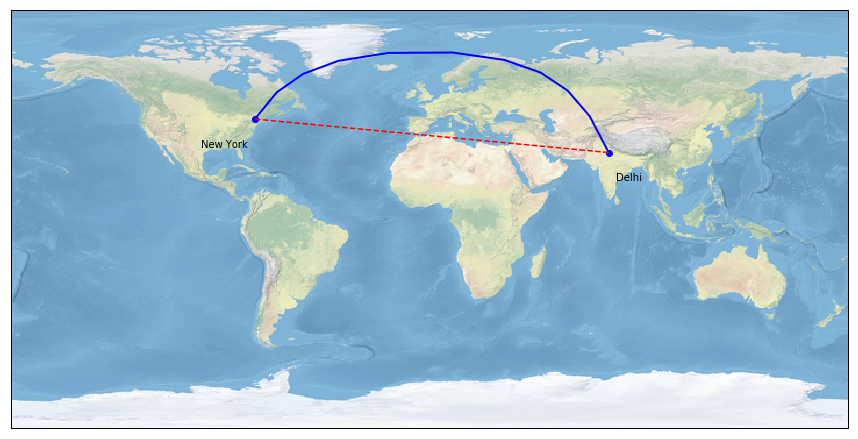

In [15]:
fig, axes = plt.subplots(1, figsize=(15, 15))

ax = plt.axes(projection=ccrs.PlateCarree())
ax.stock_img()

ny_lon, ny_lat = -75, 43
delhi_lon, delhi_lat = 77.23, 28.61

plt.plot([ny_lon, delhi_lon], [ny_lat, delhi_lat],
         color='blue', linewidth=2, marker='o',
         transform=ccrs.Geodetic(),
         )

plt.plot([ny_lon, delhi_lon], [ny_lat, delhi_lat],
         color='red', linestyle='--',
         transform=ccrs.PlateCarree(),
         )

plt.text(ny_lon - 3, ny_lat - 12, 'New York',
         horizontalalignment='right',
         transform=ccrs.Geodetic())

plt.text(delhi_lon + 3, delhi_lat - 12, 'Delhi',
         horizontalalignment='left',
         transform=ccrs.Geodetic())

plt.show()

## Understanding the difference between Projection and Transform 



### Projection = used when creating plots and determines the projection of the resulting plot (i.e. what the plot looks like)

### Transform = to plotting functions, tells Cartopy what coordinate system your data are defined in

#### example from https://scitools.org.uk/cartopy/docs/v0.16/tutorials/understanding_transform.html

#### Mock data for example

In [16]:
lon = np.linspace(-80, 80, 25)
lat = np.linspace(0, 70, 25)
lon2d, lat2d = np.meshgrid(lon, lat)

data = np.cos(np.deg2rad(lat2d) * 4) + np.sin(np.deg2rad(lon2d) * 4)**2


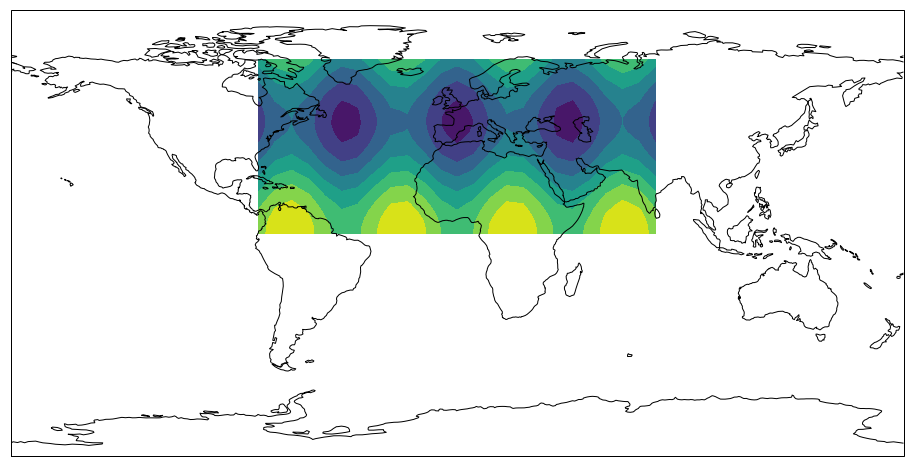

In [17]:
# The projection keyword determines how the plot will look
plt.figure(figsize=(16, 13))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_global()
ax.coastlines()

ax.contourf(lon, lat, data)  # didn't use transform, but looks ok...
plt.show()

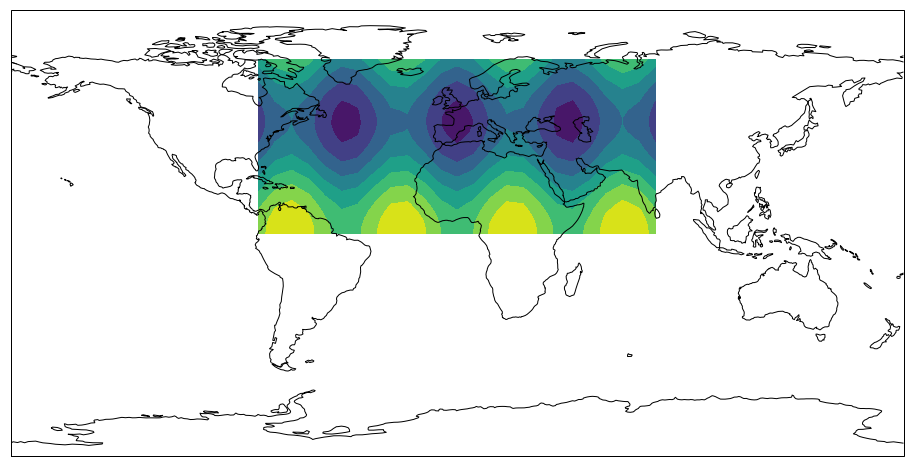

In [18]:
# The data are defined in lat/lon coordinate system, so PlateCarree()
# is the appropriate choice:
data_crs = ccrs.PlateCarree()

# The projection keyword determines how the plot will look
plt.figure(figsize=(16, 13))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_global()
ax.coastlines()

ax.contourf(lon, lat, data, transform=data_crs)
plt.show()

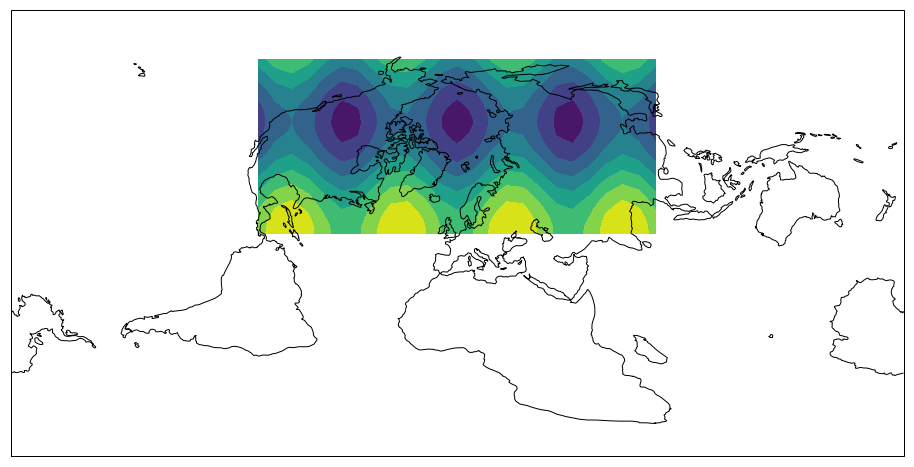

In [19]:
# Now we plot a rotated pole projection
projection = ccrs.RotatedPole(pole_longitude=-177.5, pole_latitude=37.5)
plt.figure(figsize=(16, 13))
ax = plt.axes(projection=projection)
ax.set_global()
ax.coastlines()

ax.contourf(lon, lat, data)  # didn't use transform, uh oh!
plt.show()

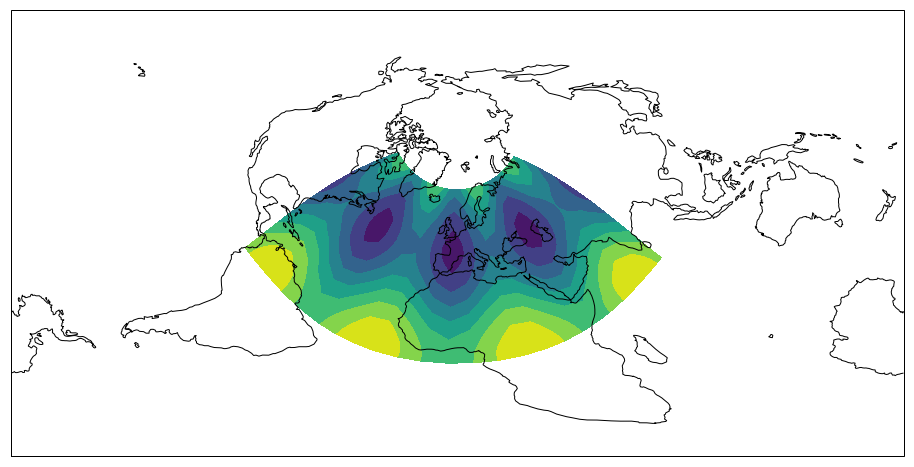

In [20]:
# A rotated pole projection again...
projection = ccrs.RotatedPole(pole_longitude=-177.5, pole_latitude=37.5)
plt.figure(figsize=(16, 13))
ax = plt.axes(projection=projection)
ax.set_global()
ax.coastlines()

# ...but now using the transform argument
ax.contourf(lon, lat, data, transform=data_crs)
plt.show()

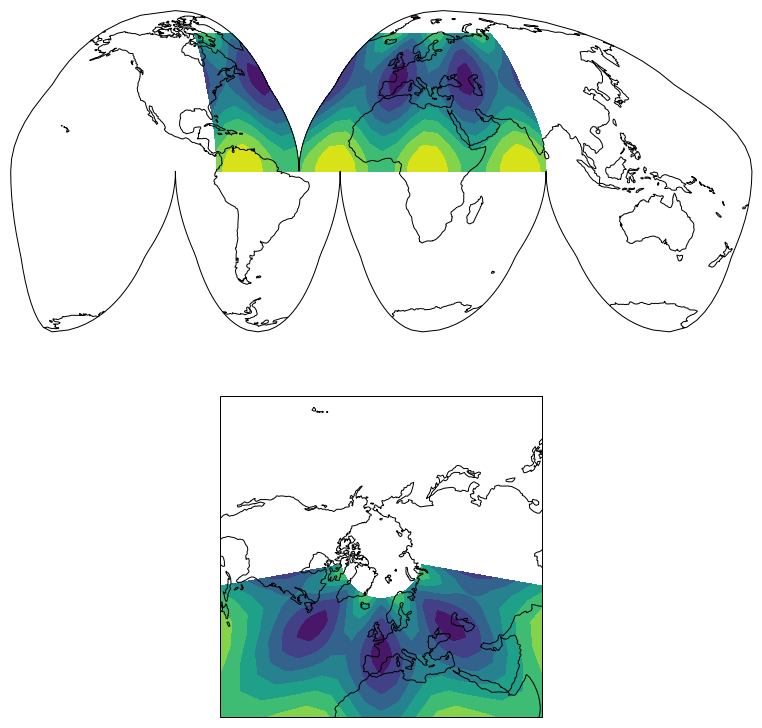

In [21]:
# We can choose any projection we like...
projection = ccrs.InterruptedGoodeHomolosine()
plt.figure(figsize=(16, 13))
ax1 = plt.subplot(211, projection=projection)
ax1.set_global()
ax1.coastlines()
ax2 = plt.subplot(212, projection=ccrs.NorthPolarStereo())
ax2.set_extent([-180, 180, 20, 90], crs=ccrs.PlateCarree())
ax2.coastlines()

# ...as long as we provide the correct transform, the plot will be correct
ax1.contourf(lon, lat, data, transform=data_crs)
ax2.contourf(lon, lat, data, transform=data_crs)
plt.show()

# Back to our seasonal data

In [22]:
import cartopy.crs as ccrs
from cartopy.mpl.geoaxes import GeoAxes
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
from mpl_toolkits.axes_grid1 import AxesGrid

In [23]:
seasonal

<xarray.Dataset>
Dimensions:  (lat: 37, lon: 144, season: 4)
Coordinates:
  * lat      (lat) float32 90.0 87.5 85.0 82.5 80.0 77.5 75.0 72.5 70.0 67.5 ...
  * lon      (lon) float32 0.0 2.5 5.0 7.5 10.0 12.5 15.0 17.5 20.0 22.5 ...
  * season   (season) object 'DJF' 'JJA' 'MAM' 'SON'
Data variables:
    hgt      (season, lat, lon) float32 5042.14 5042.14 5042.14 5042.14 ...
    air      (season, lat, lon) float32 -25.9305 -25.9305 -25.9305 -25.9305 ...

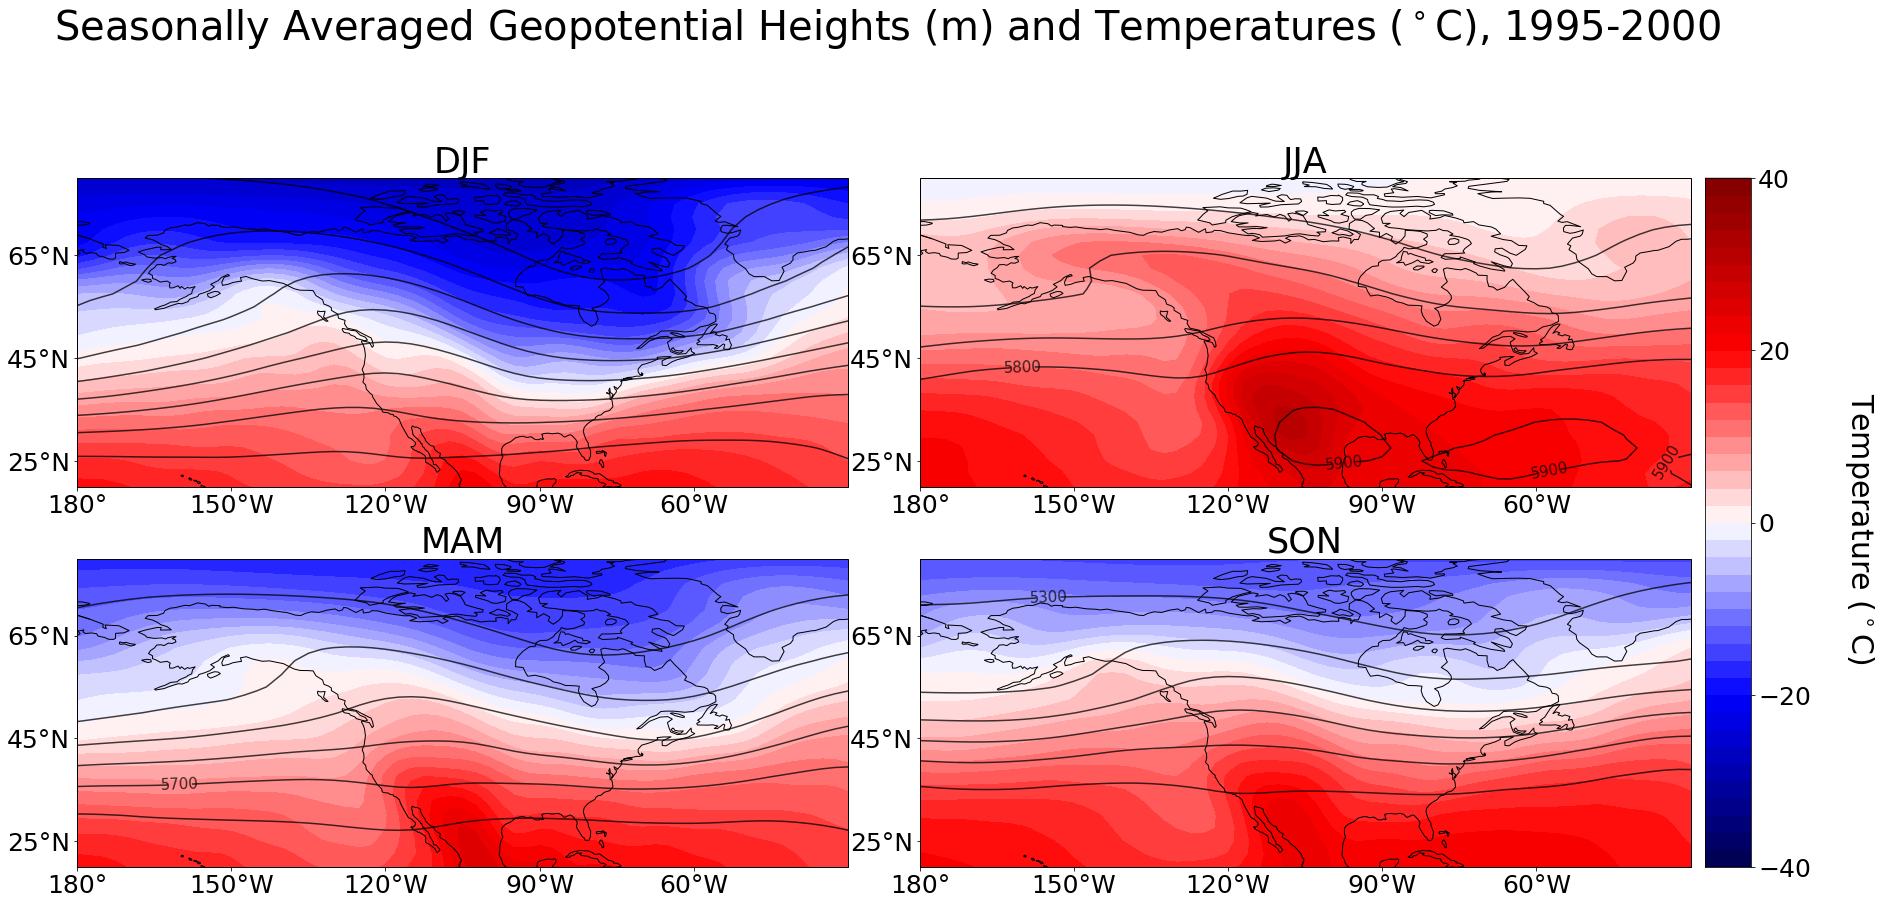

In [24]:
fig = plt.figure(figsize=(30, 15))

labels = seasonal.season.values


projection = ccrs.PlateCarree()
axes_class = (GeoAxes,
              dict(map_projection=projection))


axgr = AxesGrid(fig, 111, axes_class=axes_class,                # setting the axes class with previously defined GeoAxes
                nrows_ncols=(2, 2),
                axes_pad=1,
                cbar_location='right',
                cbar_mode='single',
                cbar_pad=0.2,
                cbar_size='3%',
                label_mode='')  # note the empty label_mode

for i, ax in enumerate(axgr):
    
    ax.set_extent([-180, -30, 20, 80], crs = ccrs.PlateCarree())
    
    ax.set_title(labels[i], fontsize = 35)
    ax.coastlines()
    ax.set_xticks(np.arange(-180, -30, 30), crs=projection)
    ax.set_yticks(np.arange(25, 80, 20), crs=projection)
    lon_formatter = LongitudeFormatter(zero_direction_label=True)
    lat_formatter = LatitudeFormatter()
    ax.xaxis.set_major_formatter(lon_formatter)
    ax.yaxis.set_major_formatter(lat_formatter)
    ax.tick_params(labelsize=25)

    levels1 = np.arange(-40, 42, 2)
    levels2 = np.arange(5000, 6050, 100)
    
    t = ax.contourf(seasonal.lon, seasonal.lat, seasonal['air'][i],
                    transform=projection,
                    cmap='seismic', levels = levels1)
    
    h_contour = ax.contour(seasonal.lon, seasonal.lat, seasonal['hgt'][i], 15, extend = 'both', colors = 'k', alpha = 0.75, levels = levels2)     # alpha sets transparency 
    h_contour.clabel(fontsize=15, colors='k', inline=1, inline_spacing=8, levels = levels2, fmt='%i', rightside_up=True, use_clabeltext=True);  
    

cb = axgr.cbar_axes[0].colorbar(t)
cb.ax.tick_params(labelsize=25)

fig.suptitle('Seasonally Averaged Geopotential Heights (m) and Temperatures ($^\circ$C), 1995-2000', fontsize=40, ha = 'center')     # don't forget to label :D 
fig.text(0.95, 0.6, "Temperature ($^\circ$C)", ha='center', fontsize=30, rotation = 270);


#plt.savefig('nameyourplothere.png', bbox_inches = "tight")     # bbox_inches limits the extra whitespcae once saved 

plt.show()
